# Colegio de Postgraduados Campus Montecillo 

### Posgrado en Socioeconomía, Estadística e Informática

### <b>Cómputo Aplicado</b>

Entrenamiento para clasificación de enfermedades en frutos de aguacate utilizando el Algoritmo de <i>Support Vector Machine</i>.

<b>Paso 1</b>: Importar las librerías necesarias. 

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

<b>Paso 2</b>: Definir la ruta de trabajo. 

In [2]:
ruta = "/Users/campos/Documents/COA 690/Entrenamientos Jupyter/Conjunto de datos/"
os.chdir(ruta)

<b>Paso 3</b>: Leer el conjunto de datos 

In [3]:
datos = pd.read_csv("Idento 30.csv")
datos.head()

,img_name,H,S,V,R,G,B,y
0,Avocado 31.jpg,32,191,174,167,174,44,0
1,Avocado 31.jpg,25,194,168,168,147,40,0
2,Avocado 31.jpg,23,198,169,169,140,38,0
3,Avocado 31.jpg,32,191,176,169,176,44,0
4,Avocado 31.jpg,26,200,170,170,153,37,0


Tomando la columna <i>y</i>; las clases quedan de la siguiente forma: 0 para frutos sanos, 1 para frutos con roña y 2 para frutos con antracnosis. 

<b>Paso 4</b>: Extraer las observaciones y sus etiquetas.

In [4]:
X = datos.iloc[:, 1:4].values
X_s = X.shape
y = datos.iloc[:, 7].values
y_s = y.shape

print("El total de las observaciones para las tripletas HSV son :", X_s)
print("El total de las etiquetas para cada observación son: ", y_s[0])

El total de las observaciones para las tripletas HSV son : (45536, 3)
El total de las etiquetas para cada observación son:  45536


Se probará la partición <b>80:20</b>; es decir, que el $80 \%$ de los datos serán utilizados para el entrenamiento y validación; y el $20 \%$ restante será para la prueba del modelo.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y)

<b>Paso 5</b>: Se llama al modelo de <i>Support Vector Machine</i>, donde se utilizarán los hiperparámetros por defecto.

In [6]:
pipe_svm = make_pipeline(StandardScaler(),
                         SVC(random_state = 1))

<b>Paso 6</b>: Optimización de mejores hiperparámetros.

Se le conoce como búsqueda por retícula, o <i>grid search</i>, al método que consiste en definir intervalos de hiperparámetros, y el modelo realizará todas las combinaciones posibles para determinar los mejores que se ajusten y entreguen la precisión global (PG) más alta.

In [7]:
param_range = [0.01, 0.1, 1.0, 10, 100, 'scale']

In [8]:
param_grid = [{'svc__C': param_range,
               'svc__gamma': param_range,
               'svc__kernel': ['rbf', 'linear']}]

In [9]:
gs = GridSearchCV(estimator = pipe_svm,
                  param_grid = param_grid,
                  scoring = 'accuracy',
                  cv = 10,
                  refit = True,
                  n_jobs = -1)

Validación cruzada

Este consiste en subdividir el conjunto de entrenamiento en grupos definidos por el usuario ($k$), en donde un subgrupo servirá como una muestra de validación para que el modelo optimice los hiperparámetros. Este es un proceso iterativo, donde cada $k$ pasará a ser un subgrupo de validación que se evaluará con los restantes.

In [10]:
kfold = StratifiedKFold(n_splits = 10).split(X_train, y_train)
scores = []
for k, (train, test) in enumerate(kfold):
    pipe_svm.fit(X_train[train], y_train[train])
    score = pipe_svm.score(X_train[test], y_train[test])
    scores.append(score)
    print("Partición: %2d, Class dist.: %s, Acc: %.5f" % (k+1, np.bincount(
        y_train[train]), score))

Partición:  1, Class dist.: [10953 10682 11150], Acc: 0.96239
Partición:  2, Class dist.: [10953 10682 11150], Acc: 0.96843
Partición:  3, Class dist.: [10953 10682 11150], Acc: 0.96596
Partición:  4, Class dist.: [10953 10682 11150], Acc: 0.96486
Partición:  5, Class dist.: [10953 10682 11150], Acc: 0.96651
Partición:  6, Class dist.: [10953 10682 11150], Acc: 0.96624
Partición:  7, Class dist.: [10953 10682 11150], Acc: 0.96514
Partición:  8, Class dist.: [10953 10682 11150], Acc: 0.96514
Partición:  9, Class dist.: [10953 10683 11150], Acc: 0.96568
Partición: 10, Class dist.: [10953 10682 11151], Acc: 0.97199


Para este caso, estos valores pertenecen al modelo SVM con los hiperparámetros por defecto, a continuación se obtendrán los mejores hiperparámetros. 

In [11]:
gs = gs.fit(X_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
120 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.9/site-packages/sklea

In [12]:
gs.best_params_

{'svc__C': 10, 'svc__gamma': 10, 'svc__kernel': 'rbf'}

<b>Paso 7</b>: Con base a esos mejores hiperparámetros, se realiza un nuevo entrenamiento, donde se definen esos valores en el modelo. 

In [7]:
pipe_svm = make_pipeline(StandardScaler(),
                         SVC(C = 10,
                             gamma = 10,
                             kernel = 'rbf',
                             probability = True,
                             random_state = 1))

In [8]:
kfold = StratifiedKFold(n_splits = 10).split(X_train, y_train)
scores = []
for k, (train, test) in enumerate(kfold):
    pipe_svm.fit(X_train[train], y_train[train])
    score = pipe_svm.score(X_train[test], y_train[test])
    scores.append(score)
    print("Partición: %2d, Class dist.: %s, Acc: %.5f" % (k+1, np.bincount(
        y_train[train]), score))

Partición:  1, Class dist.: [10953 10682 11150], Acc: 0.96871
Partición:  2, Class dist.: [10953 10682 11150], Acc: 0.97173
Partición:  3, Class dist.: [10953 10682 11150], Acc: 0.97392
Partición:  4, Class dist.: [10953 10682 11150], Acc: 0.97063
Partición:  5, Class dist.: [10953 10682 11150], Acc: 0.97200
Partición:  6, Class dist.: [10953 10682 11150], Acc: 0.97035
Partición:  7, Class dist.: [10953 10682 11150], Acc: 0.97008
Partición:  8, Class dist.: [10953 10682 11150], Acc: 0.97282
Partición:  9, Class dist.: [10953 10683 11150], Acc: 0.97364
Partición: 10, Class dist.: [10953 10682 11151], Acc: 0.97968


In [9]:
pipe_svm.score(X_train, y_train)

0.975815306906775

<b>Paso 7</b>: Evaluar el modelo con los datos de prueba ($20 \%$) 

In [10]:
y_train_pred = pipe_svm.predict(X_train)
y_test_2 = pipe_svm.predict(X_test)
y_test_pred = pipe_svm.predict_proba(X_test) # Este es utilizado para crear las curvas ROC - AUC

<b>Paso 8</b>: Obtener matriz de confusión y curvas ROC - AUC para los datos de prueba 

In [11]:
print(metrics.classification_report(y_test, y_test_2))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      3043
           1       0.99      0.96      0.97      2967
           2       0.97      0.98      0.98      3098

    accuracy                           0.97      9108
   macro avg       0.98      0.97      0.97      9108
weighted avg       0.97      0.97      0.97      9108



Como se puede observar, la matriz de confusión redondea al entero siguiente los valores de exactitud o <i>accuracy</i>. 

<b>Matriz de confusión</b>

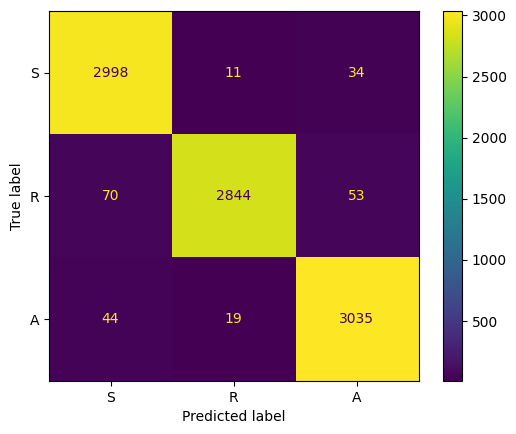

In [12]:
etiquetas = ["S", "R", "A"]
cm = confusion_matrix(y_test, y_test_2, labels = pipe_svm.classes_)
display = ConfusionMatrixDisplay(confusion_matrix = cm,
                                 display_labels = etiquetas)
display.plot()

Donde S corresponde a los frutos sanos; R a los frutos con roña y A a los frutos con antracnosis. 

<b>Curva ROC y AUC</b> 

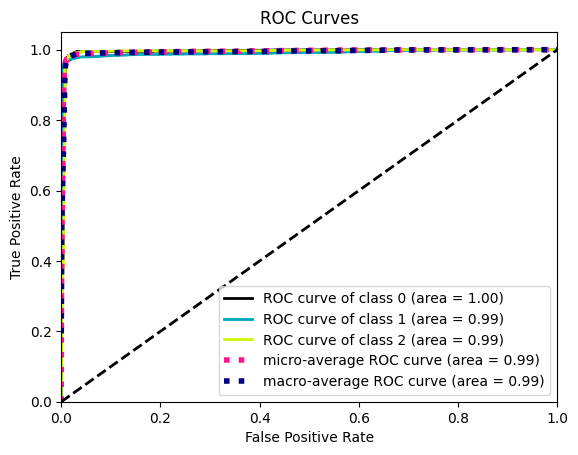

In [13]:
skplt.metrics.plot_roc(y_test, y_test_pred)
plt.show()

Adicionalmente, se realizó otro entrenamiento, que, para este caso, se utilizó el $100 \%$ de los datos para entrenamiento y validación, utilizando los hiperparámetros optimizados. 

In [8]:
kfold = StratifiedKFold(n_splits = 10).split(X, y)
scores = []
for k, (train, test) in enumerate(kfold):
    pipe_svm.fit(X[train], y[train])
    score = pipe_svm.score(X[test], y[test])
    scores.append(score)
    print("Partición: %2d, Class dist.: %s, Acc: %.5f" % (k+1, np.bincount(
        y[train]), score))

Partición:  1, Class dist.: [13691 13353 13938], Acc: 0.96860
Partición:  2, Class dist.: [13691 13353 13938], Acc: 0.93017
Partición:  3, Class dist.: [13691 13353 13938], Acc: 0.97233
Partición:  4, Class dist.: [13692 13352 13938], Acc: 0.96399
Partición:  5, Class dist.: [13692 13352 13938], Acc: 0.96333
Partición:  6, Class dist.: [13692 13352 13938], Acc: 0.92468
Partición:  7, Class dist.: [13692 13352 13939], Acc: 0.97145
Partición:  8, Class dist.: [13692 13352 13939], Acc: 0.97189
Partición:  9, Class dist.: [13692 13352 13939], Acc: 0.85592
Partición: 10, Class dist.: [13692 13353 13938], Acc: 0.86998


In [15]:
pipe_svm.score(X, y)

0.9676958889669712

In [9]:
y_test_pred = pipe_svm.predict(X)
y_proba = pipe_svm.predict_proba(X) # Este es utilizado para crear las curvas ROC - AUC

In [10]:
print(metrics.classification_report(y, y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97     15213
           1       0.99      0.95      0.97     14836
           2       0.95      0.99      0.97     15487

    accuracy                           0.97     45536
   macro avg       0.97      0.97      0.97     45536
weighted avg       0.97      0.97      0.97     45536



<b>Como se puede observar, utilizando la partición 80:20, como el total de las observaciones, para este modelo optimizado, se obtienen las mismas métricas de desempeño</b>. 

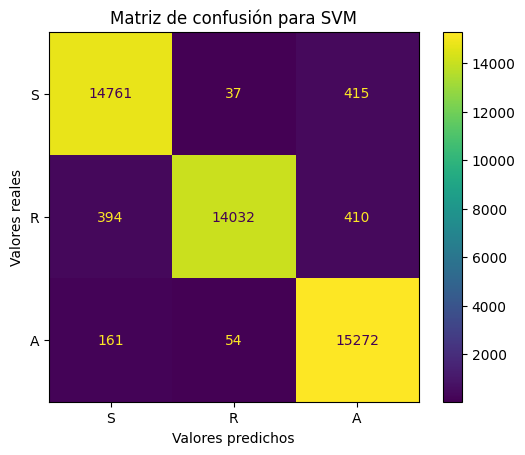

In [11]:
etiquetas = ["S", "R", "A"]
cm = confusion_matrix(y, y_test_pred, labels = pipe_svm.classes_)
display = ConfusionMatrixDisplay(confusion_matrix = cm,
                                 display_labels = etiquetas)
display.plot()
plt.title("Matriz de confusión para SVM")
plt.xlabel("Valores predichos")
plt.ylabel("Valores reales")
plt.show()

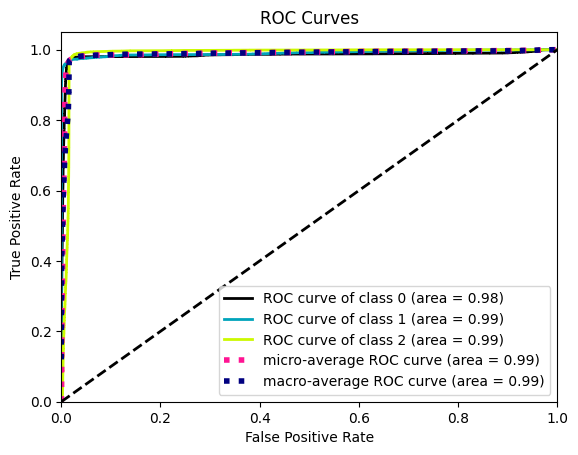

In [19]:
skplt.metrics.plot_roc(y, y_proba)
plt.show()

Existe una ligera diferencia entre las curvas, para ambos conjuntos de datos. 

## Evaluación del modelo con imágenes fuera del modelo

Debido a que el modelo realiza las clasificaciones a nivel de pixeles, se hizo una prueba con imágenes que no se utilizaron en el modelo, se extrajeron los valores RGB, posteriormente se transformaron a HSV y se eliminaron todos los valores de pixel pertenecientes al fondo de la imagen. Por último, se utilizó el modelo entrenado para poder realizar las clasificaciones a cada imagen. 

<b>Paso 1</b>: Extraer los valores de la imagen. La librería PIL ofrece la función `get_data()`, la cual tiene la ventaja de extraer el arreglo de cada canal, dejando solamente un arreglo bidimensional, que en cada columna se encuentra del valor correspondiente a cada canal.

In [20]:
import colorsys
from PIL import Image

def extrae (imagen):
    '''
    Función que va a extraer los valores de cada pixel de una imagen.
    
    Toma como argumento una imagen, y la función getdata() regresará,
    para este caso, un arreglo de tipo numpy con los valores de pixel, de
    dimensión 3 X n, donde cada columna se encuentra representada por un canal.
    
    '''
    
    arreglo = Image.open(imagen)
    valores = np.array(arreglo.getdata())
    
    return valores

<b>Paso 2</b>: Convertir los valores RGB al espacio de color HSV. la librería colorsys, mediante su función `rgb_to_hsv` recibe como argumento una tupla de tres elementos, donde cada uno corresponde a un canal. Este proceso iterativo se realizará con cada uno de los elementos presentes en la matriz que recibe del Paso 1. 

In [21]:
def convierte (matriz):
    
    '''
    Función que va a convertir los valores RGB a HSV.
    
    Toma como argumento la matriz generada de la función extrae()
    En una nueva lista vacía se llenará con los nuevos valores HSV.
    
    Regresa un arreglo de tipo numpy.
    
    '''
    
    lista = []
    
    for i in range(matriz.shape[0]):
        (r, g, b) = (matriz[i][0], matriz[i][1], matriz[i][2])

        (r, g, b) = (r / 255,
                     g / 255,
                     b / 255)
         
        (h, s, v) = colorsys.rgb_to_hsv(r, g, b)
       
        (h, s, v) = (int(h * 179),
                     int(s * 255),
                     int(v * 255))
        
        valores = (h,s,v)
        
        lista.append(valores)
        
    salida = np.array(lista, dtype = (int))

    return salida

<b>Paso 3</b>: Debido a que la imagen se encuentra con un fondo completamente blanco, se realizó una función con la capacidad de extraer tanto el fondo, como el fruto, así como un conteo en pixeles pertenecientes a cada objeto. 

In [22]:
def quitar_fondo(matriz_hsv):
    
    pixeles_fondo = []
    pixeles_salida = []
    c_fondo = 0
    c_salida = 0
    
    fondo = background()
    
    for i in range(matriz_hsv.shape[0]):
        
        if np.array_equal(matriz_hsv[i], fondo) == True:
            pixeles_fondo.append(matriz_hsv[i])
            c_fondo = c_fondo + 1
        else:
            pixeles_salida.append(matriz_hsv[i])
            c_salida = c_salida + 1
            
    pixeles_total = c_fondo + c_salida
    porcentaje_fondo = (c_fondo * 100) / pixeles_total
    porcentaje_fruto = (c_salida * 100) / pixeles_total
    
    print("Total de pixeles en la imagen: %d" % pixeles_total)
    
    print("El total de pixeles fondo fue: %d (%.2f %%)" % (c_fondo, 
                                                           porcentaje_fondo))
    print("El total de pixeles del fruto fue: %d (%.2f %%) \n" % (c_salida,
                                                                 porcentaje_fruto))
    
    return (pixeles_fondo, pixeles_salida)

def background():
    
    fondo = np.array([0, 0, 255])
    
    return fondo

<b>Paso 4</b>: Se realiza la predicción de la imagen utilizando el modelo entrenado. Se obtiene un conteo de todos los pixeles pertenecientes a cada clase.

In [23]:
def clasifica(imagen_RGB):
    
    c1 = 0
    c2 = 0
    c3 = 0
    
    paso1 = extrae(imagen_RGB)
    
    paso2 = convierte(paso1)
    
    paso3 = quitar_fondo(paso2)
    
    paso4 = pipe_svm.predict(paso3[1])
    
    for i in range(len(paso4)):
        
        if paso4[i] == 0:
            c1 = c1 + 1
        elif paso4[i] == 1:
            c2 = c2 + 1
        elif paso4[i] == 2:
            c3 = c3 + 1
    
    total_frutos = c1 + c2 + c3
    p_c1 = (c1 * 100)/total_frutos
    p_c2 = (c2 * 100)/total_frutos
    p_c3 = (c3 * 100)/total_frutos
    
    print("El total de pixeles sanos fue: %d (%.2f %%)" % (c1, p_c1))
    print("El total de pixeles con roña fue: %d (%.2f %%)" % (c2, p_c2))
    print("El total de pixeles con antracnosis fue: %d (%.2f %%)" % (c3, p_c3))


In [31]:
clasifica("/Users/campos/Downloads/Original 03.jpg")

Total de pixeles en la imagen: 65536
El total de pixeles fondo fue: 56521 (86.24 %)
El total de pixeles del fruto fue: 9015 (13.76 %) 

El total de pixeles sanos fue: 783 (8.69 %)
El total de pixeles con roña fue: 1 (0.01 %)
El total de pixeles con antracnosis fue: 8231 (91.30 %)
